<a href="https://colab.research.google.com/github/minerva79/woodpecker/blob/master/py/Working_with_music_on_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Music on Python
*Adam Quek / 8 October 2022*

Scope:

* Exploring the functionality of *music21* and *arvo* python packages to generate score and midi files for simple music composition.
* Example of music score and midi generation (*Anne Foxe*)
* Add in variations to the music example


### Libraries ###

Music21 is a Python-based toolkit for computer-aided musicology. People use music21 to answer questions from musicology using computers, to study large datasets of music, to generate musical examples, to teach fundamentals of music theory, to edit musical notation, study music and the brain, and to compose music (both algorithmically and directly). The system has been around since 2008 and is constantly growing and expanding. 
* https://web.mit.edu/music21/

Arvo is a python library for procedural music composition, based on the music21 framework. The package is named after the Estonian composer Arvo Pärt and is created and maintained by Georges Dimitrov (https://www.concordia.ca/finearts/music.html). The library is currently in alpha development state.

* https://github.com/georgesdimitrov/arvo
* https://deepnote.com/@essia/Procedural-music-composition-with-arvo-9b35ebd7-63e0-47bc-a3d5-c503954a083d


MuseScore is a scorewriter that support a wide variety of file formats and input methods.

* https://musescore.org/en


# Setting up music21, arvo and MuseScore on Google Colab
*Run these cells to upgrade music21, arvo and install MuseScore for Google Colab.*









In [1]:
!pip install --upgrade music21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.4 MB 1.6 MB/s 
  Attempting uninstall: music21
    Found existing installation: music21 5.5.0
    Uninstalling music21-5.5.0:
      Successfully uninstalled music21-5.5.0


In [2]:
!pip install --upgrade arvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for arvo: filename=arvo-0.3.0-py3-none-any.whl size=11380 sha256=f3667b8454ed4192d400b77d10839bedd883f97a665dcfdc09b082e3139c1478
  Stored in directory: /root/.cache/pip/wheels/32/0d/df/ca3a9773007d3fa87961ae99c28b339378383cc32198f3aeb9
Successfully built arvo


In [3]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [950 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 

In [4]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 785 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 785 kB in 1s (1,416 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 124902 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.11_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.11) ...
Setting up xvfb (2:1.19.6-1ubuntu4.11) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [5]:
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

# music21 is Open Source under the BSD License
# Copyright (c) 2006-22 Michael Scott Asato Cuthbert and cuthbertLab
# Support music21 by citing it in your research or produts:
#
#     Cuthbert, Michael Scott.  
#     _music21: a Toolkit for Computer-Aided Music Research_
#     https://web.mit.edu/music21
#     2006-22

# Exploring the functionality of music21 to generate score and midi

Music21 allows user to quickly insert in a pitch based from different format. Exmple:
* note letter and octave (e.g. *note.Note("C4)* will generate the middle C on piano)

* pitch number on chromatic scale, where 0 = C, 1 = C#/D- (e.g. *pitch.Pitch(3)*)

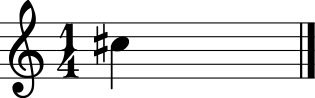

In [6]:
from music21 import *
n = note.Note('C#5')
n.show() # to show generated score
n.show('midi') # to show as midi

music21.stream allows appending multiple notes and rests together

In [7]:
stream1 = stream.Stream()
stream1.id = 'some notes'
stream1.insert(0, note.Note('C4')) 
stream1.insert(2, note.Note('D4'))
stream1.show('text') # describes the {position} and <note> of the Stream

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note D>


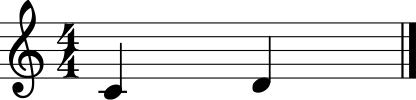

In [8]:
 stream1.show() 
 stream1.show('midi')

Other than pitch, notes are also defined by different lengths. By default, each note is a crotchet or a quarter length (relative to the tempo). To change the length for each note, we can state them in the *quarterlength* argument in the Note object.

In [9]:
n1 = note.Note('C', quarterLength = 1)
n2 = note.Note('E', quarterLength = .5)
n3 = note.Note('G', quarterLength = .5)
n4 = note.Note('C', quarterLength = 2)

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note E>
{1.5} <music21.note.Note G>
{2.0} <music21.note.Note C>


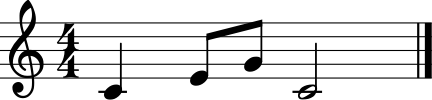

In [10]:
stream2 = stream.Stream()
stream2.append([n1, n2, n3, n4])

stream2.show('text') 
stream2.show()
stream2.show('midi')

## Other in-built function music21 - corpus

The music21 corpus includes a collection of freely distributable music in MusicXML, Humdrum, and other representations. The corpus package is an interface for easily working with this data.

List of Works Found in the music21 Corpus https://web.mit.edu/music21/doc/about/referenceCorpus.html#referencecorpus

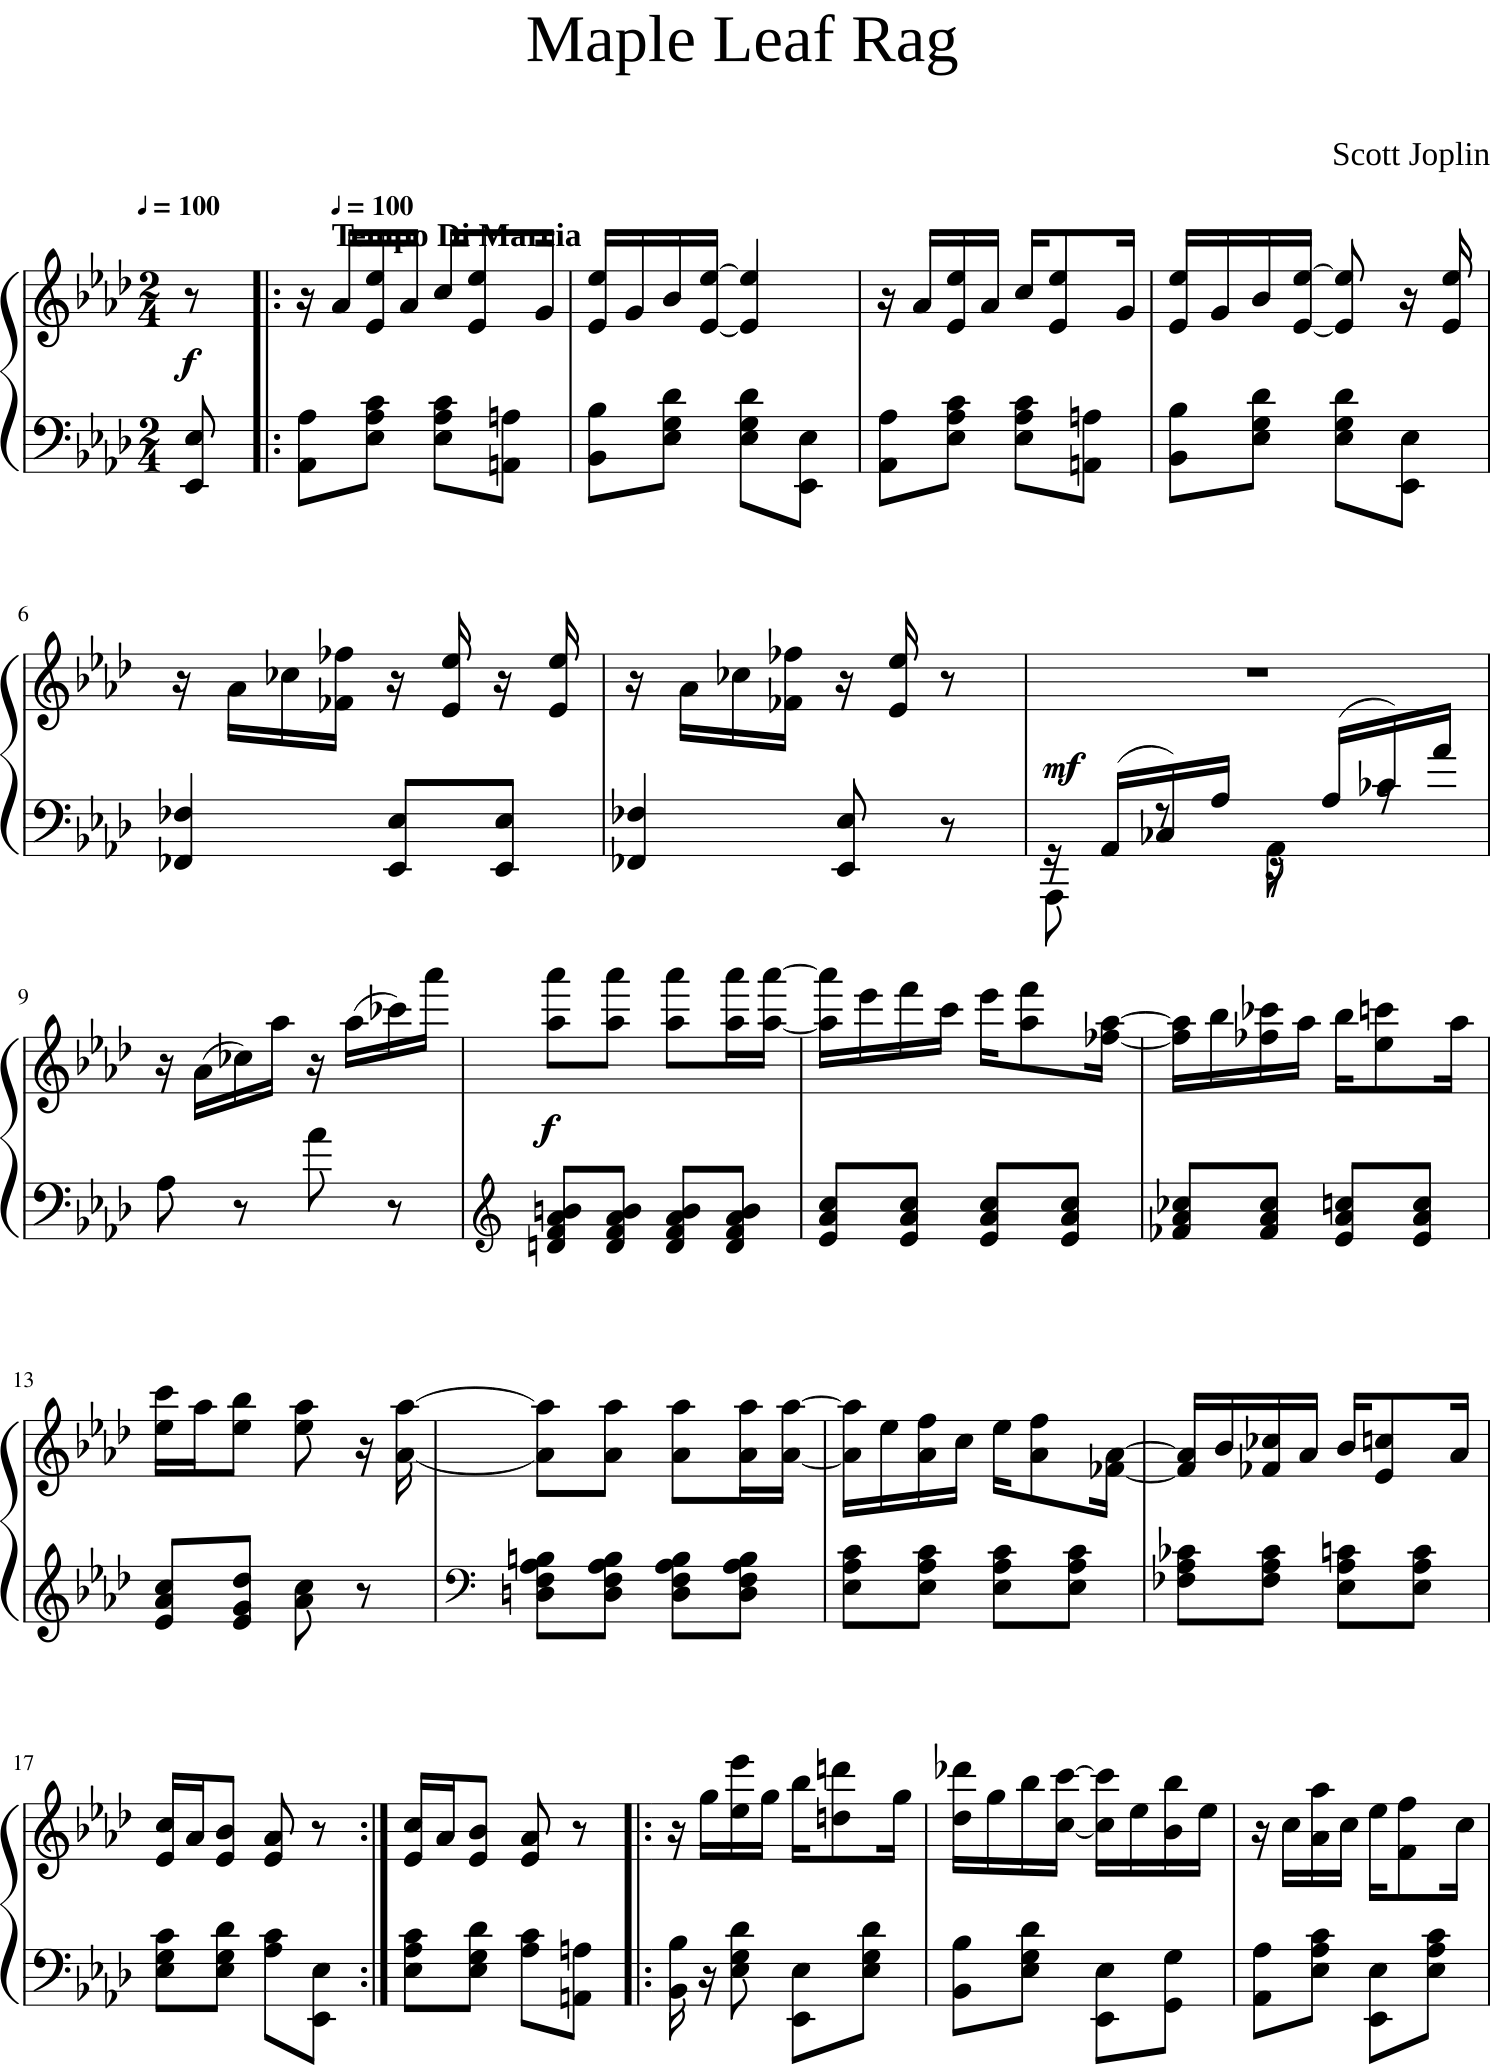

In [11]:
# Example of extracting Scott Joplin's Maple Leaf Rag (1899)

b = corpus.parse('joplin/maple_leaf_rag.mxl')
b.show()
b.show("midi")

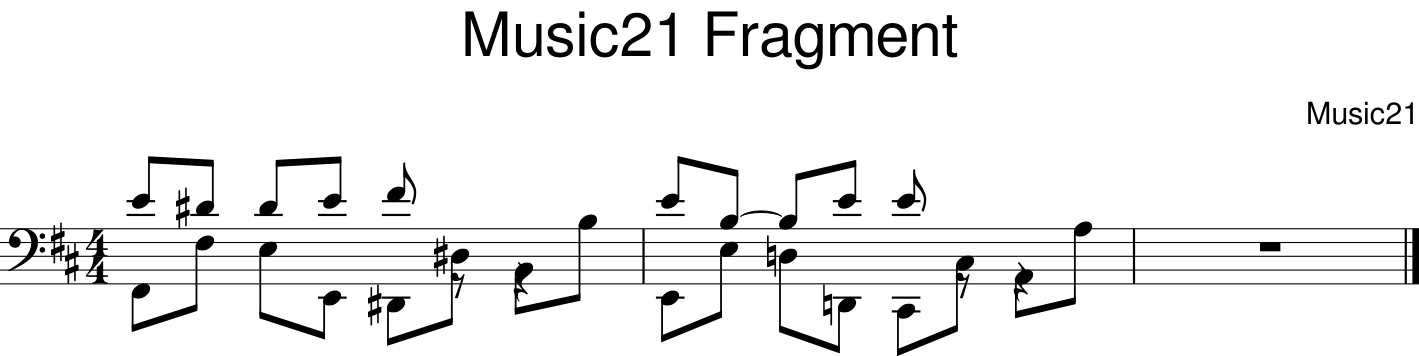

In [12]:
s = corpus.parse('demos/two-voices.xml')
s.show()
s.show('midi')

# Example of Generating Music Score and Midi (Anne Foxe)

Anna Foxe is a Irish traditional music composed by Josephine Marsh (https://www.youtube.com/watch?v=Ba4x5Ac61LE). The first track on Marsh's latest album, "Music in the Frame" (2018), this tune has been particularly population with melodion, accordion and concertina players in the social media. The rendition by Mareka Naito (Concertina) and Junji Shirota (Guitar) on Youtube is an particularly clean and light - https://www.youtube.com/watch?v=OlqSV8skuLA. 

The code below is how I'd transposed the tune from audio format into readable scores and generating a midi file. This was achieved *via* 'arvo', a package built on top of 'music21' that speeds up the procedural music composition process. 


In [13]:
from arvo import tools, isorhythm

In [14]:
start_notes = ['D5', 'E5']
start_duration = [.5, .5]

part_a_notes = ['F#5', 'A5', 'D5', 'C#5', 'A4', 'B4', 'D5', 'C#5', 'B4', 'A4',
                'B4', 'C#5', 'D5', 'C#5', 'D5', 'E5', 'D5', 'E5', 'F#5', 'A5', 'F#5', 'E5',
                'D5', 'C#5', 'C#5', 'B4', 'C#5', 'D5', 'A4', 'C#5', 'D5', 'E5',
                'A5', 'G5', 'G5', 'F#5', 'E5', 'D5',]

part_a_duration = [1, 1, 1, .5, .5, .5, .5, .5, .5, 1,  
                .5, .5, 1, .5, .5, 1, .5, .5, 1, .5, .5, 1, 
                .5, .5, .5, .5, .5, .5, 1, .5, .5, 1, 
                .5, .5, .5, .5, .5, .5,]

phase1_notes = ['B4', 'C#5', 'D5', 'E5', 'F#5', 'G5', 'A5',
                'B5', 'A5', 'B5', 'A5']

phase1_duration = [1, .5, .5, 1, .5, .5, 2,
                   .25, .5, .25, 1]

phase2_notes = ['B4', 'G5', 'F#5', 'E5', 'D5', 'C#5', 'D5', 'C#5']
phase2_duration = [1, 1, .5, .5, .5, .5, 3, 1] 


part_b_notes = ['B4', 'C#5', 'D5', 'D5', 'C#5', 'B4', 'A4', 'G4', 'F#5', 'E5', 'E5', 
                'C#5', 'A4', 'F#4', 'A4', 'C#5', 'E5',
                'G4', 'B4', 'D5', 'F#5', 'B4', 'G5', 'F#5', 'F#5', 'E5', 'D5', 'C#5',
                'D5', 'C#5', 'D5', 'F#5', 'A4',
                'G5', 'F#5', 'E5', 'A5', 'G5', 'A5', 'F#5',
                'E5', 'D5', 'B4', 'G5', 'F#5', 'E5', 'D5', 'C#5']

part_b_duration = [1, .5, .5, .5, .5, .5, .5, 1, .5, .5, 1, 
                   .5, .5, .5, .5, .5, .5, 
                   .5, .5, .5, .5, 1, .5, .5, .5, .5, .5, .5,
                   .5, .5, .5, .5, 1,
                   .5, .5, .5, .5, .5, .5, 1,
                   .5, .5, 1, 1, .5, .5, .5, .5]

phase3_notes = ['D5', 'C#5']
phase3_duration = [3, 1]

phase4_notes = ['D5']
phase4_duration = [3]

notes = start_notes + part_a_notes + phase1_notes + part_a_notes + phase2_notes + part_b_notes + phase3_notes + part_b_notes + phase4_notes
notes_duration = start_duration + part_a_duration + phase1_duration + part_a_duration + phase2_duration + part_b_duration + phase3_duration + part_b_duration + phase4_duration

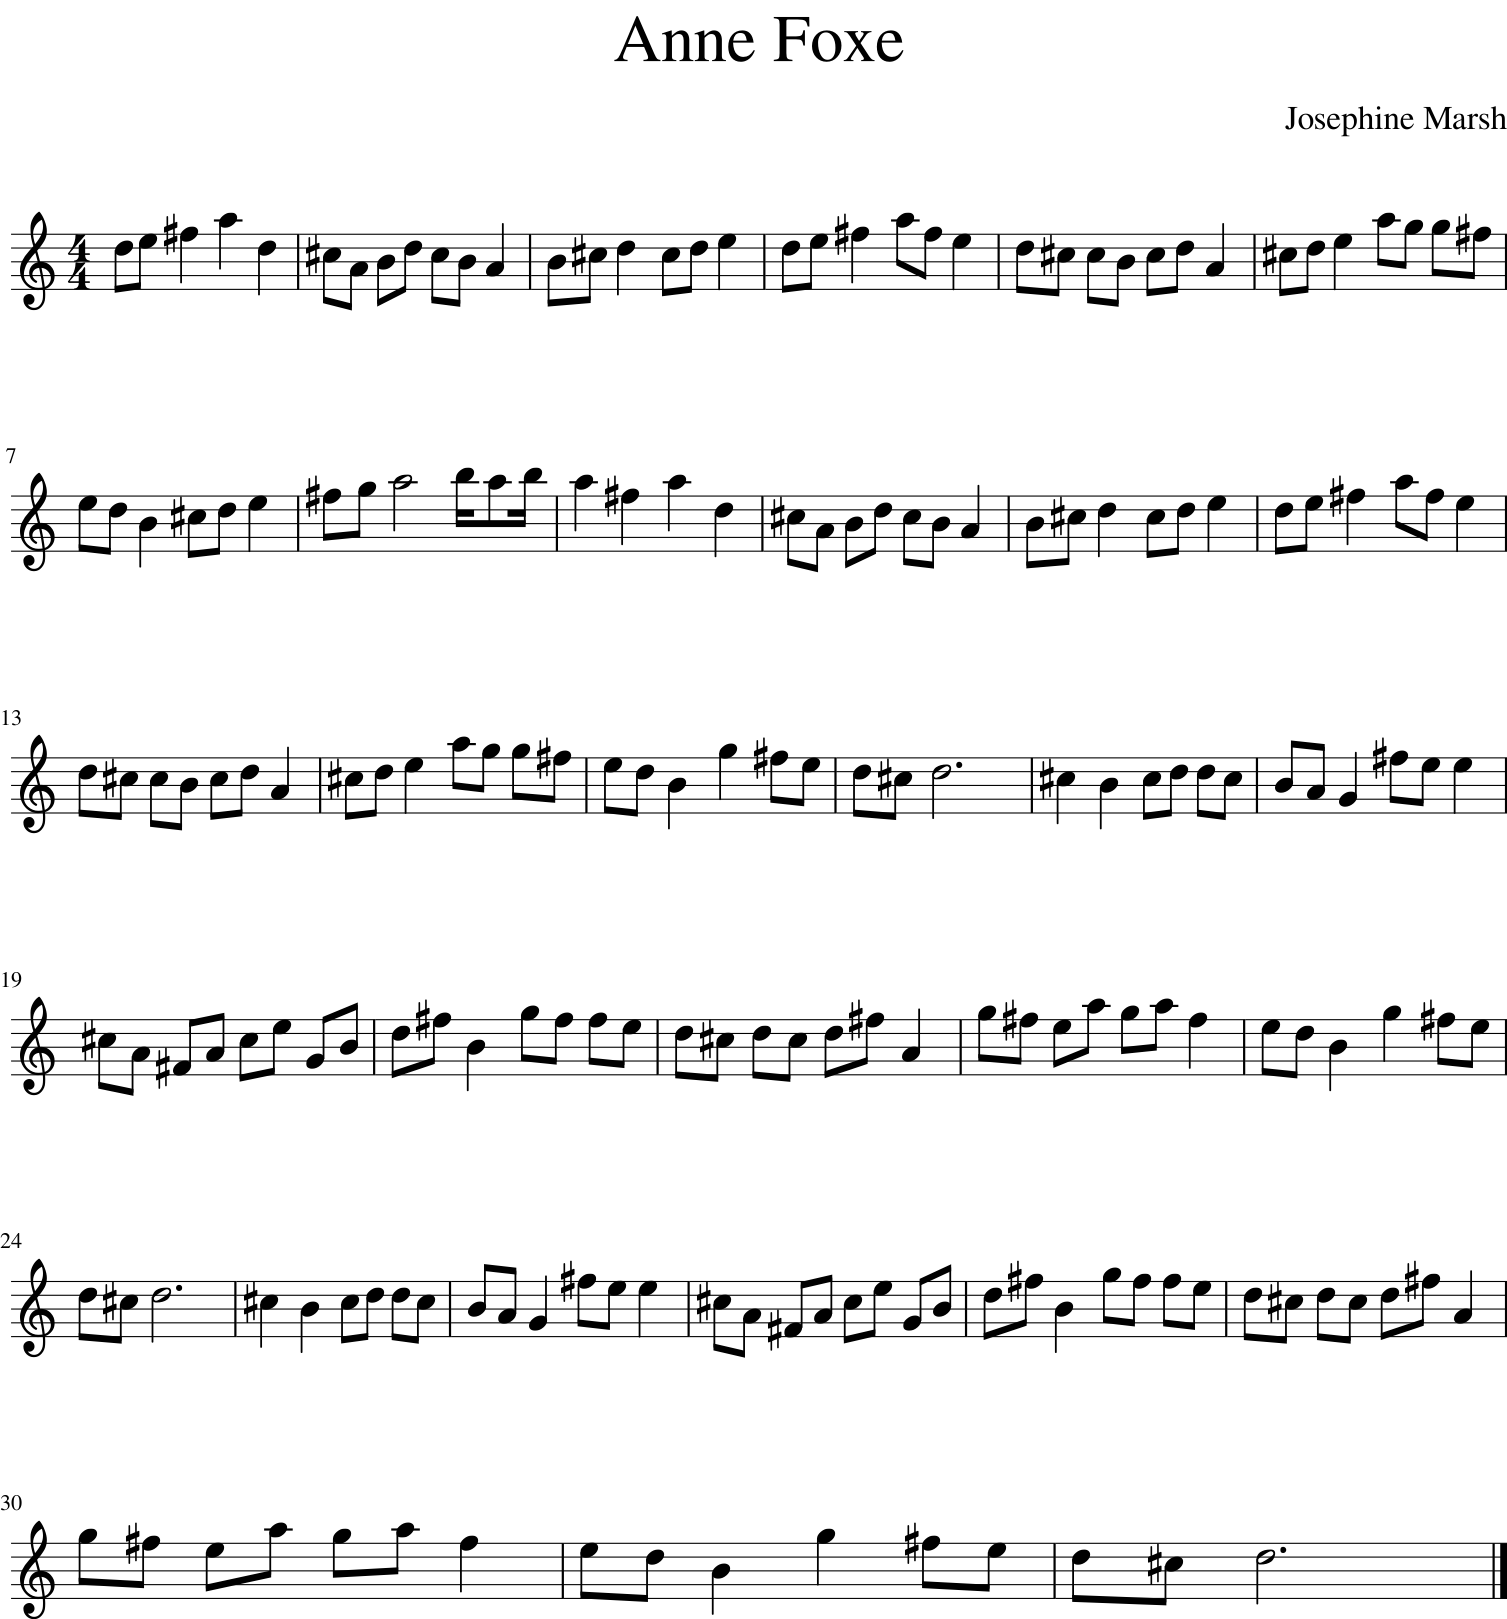

In [15]:
all_notes = tools.notes_to_stream(notes)
all_duration = tools.durations_to_stream(notes_duration)

melody = isorhythm.create_isorhythm(all_notes, all_duration)

melody.insert(0, metadata.Metadata())
melody.metadata.title = 'Anne Foxe'
melody.metadata.composer = 'Josephine Marsh'

melody.show()
melody.show('midi')

Exporting the generated melody to midi and pdf file. 

In [16]:
melody.write('midi', fp='anne_foxe.midi')
melody.write('musicxml.pdf', fp='anne_foxe.pdf')

PosixPath('/content/anne_foxe.pdf')

# Adding Variations to Anne Foxe



## (1) Naive example to appending chords based on melody

Steps include:

* extracting the pitch of the third crotchet beat for each bar
* extending the extracted pitch to cover the duration for each bar (4 crotchet beat)
* generate a tonic triad (root, major 3rd and perfect 5th) based on each of the extracted note
* transpose the tonic triad by an octave
* appending to the Anne Foxe melody

In [17]:
# Function to extract and extend the third crotchet pitch for each bar

from music21 import *
import copy


def beat_note(x, step):
    bn_s = stream.Stream()
    split_at = 2.0 # first split
    while split_at < x.quarterLength:
        track_split = copy.deepcopy(x)
        if split_at != 2.0:
            track_split = track_split.splitAtQuarterLength(split_at)[1]
        measure_note = track_split[0]
        measure_note.duration = duration.Duration(step)
        bn_s.append(track_split[0])
        split_at += step
    return(bn_s)

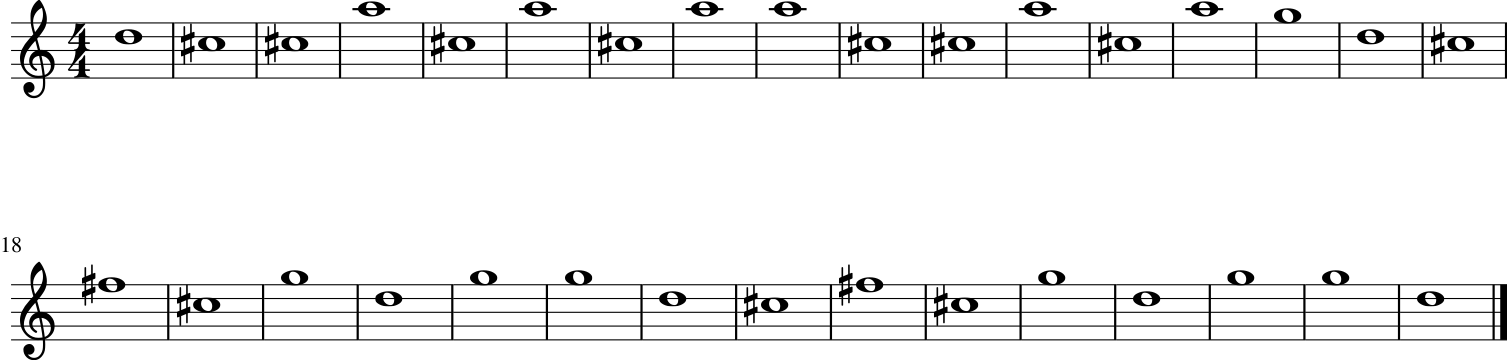

In [18]:
melody = isorhythm.create_isorhythm(all_notes, all_duration)

melody_third = beat_note(melody, step = 4)
melody_third.show()
melody_third.show("midi")

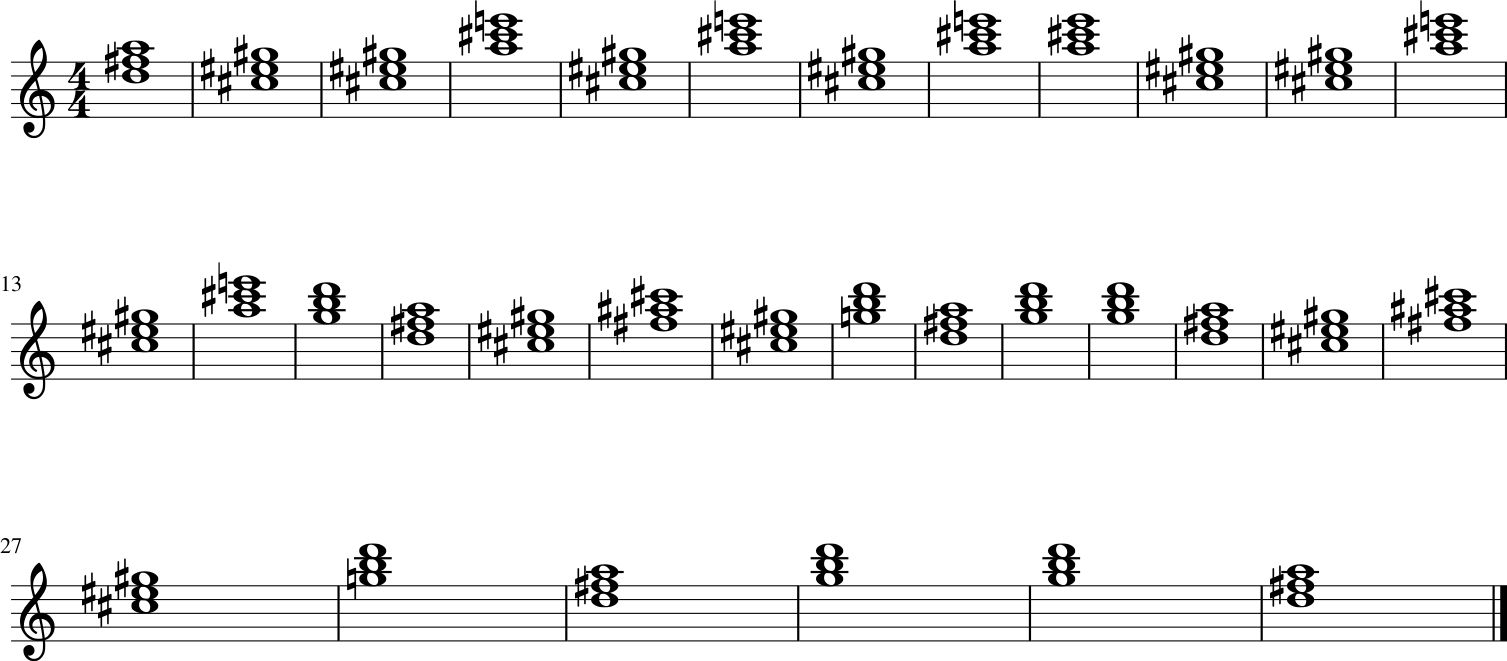

In [19]:
# generating tonic triad by transposing major 3rd and perfect 5th of each note, and appending them as chords

melody_third = beat_note(melody.flatten(), step = 4)
melody_chords = stream.Stream()
for n in melody_third.notes:
    melody_chords.append(chord.Chord([n, n.transpose("M3"), n.transpose("P5")]))

melody_chords.show()
melody_chords.show('midi')

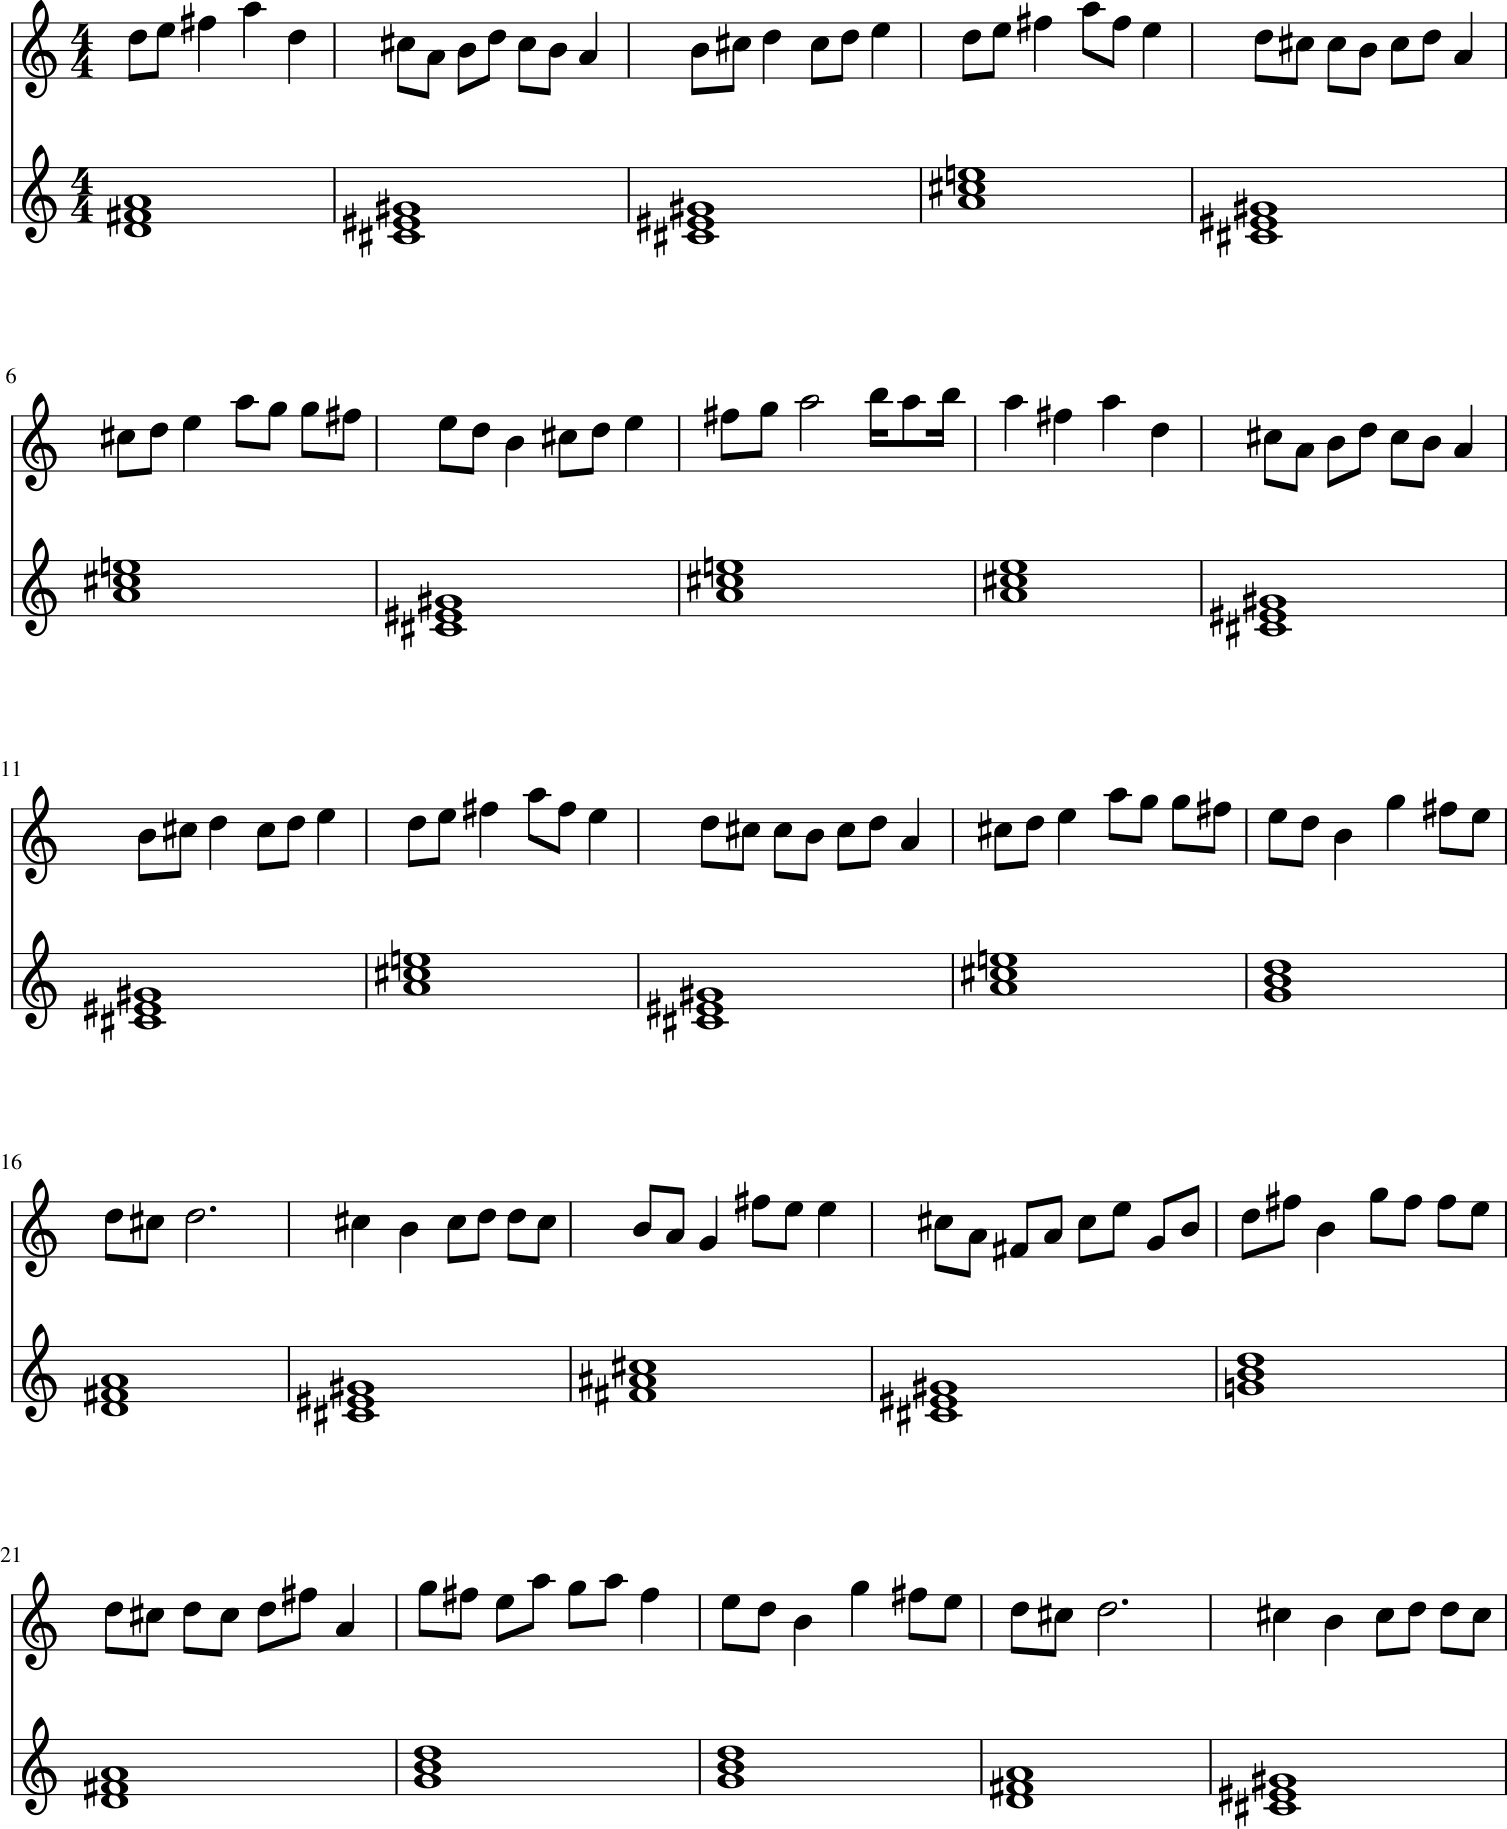

In [20]:
# lower the chord by one octave
melody_chords = melody_chords.flatten().transpose("P-8")

# joining the chords to the melody
tracks = stream.Score()
tracks.insert(melody)
tracks.insert(melody_chords)

tracks.show()
tracks.show('midi')

## (2) Shuffling notes, while retaining the same note duration

We can create variation by randomising the pitch of the first two bars of Anne Foxe, while retaining the duration.

In [21]:
# Notes and duration of first two bars of Anne Foxe

notes2 = ['D5', 'E5', 'F#5', 'A5', 'D5', 'C#5', 'A4', 'B4', 'D5', 'C#5', 'B4', 'A4']
notes2_duration = [.5, .5, 1, 1, 1, .5, .5, .5, .5, .5, .5, 1]

abb_melody = isorhythm.create_isorhythm(
    notes2, 
    notes2_duration
)

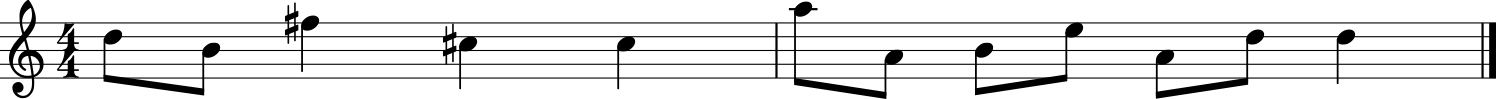

In [22]:
import random

shuffled_notes = notes2.copy() # copy to avoid overwriting the notes

random.seed(400)
random.shuffle(shuffled_notes) # shuffling the notes in place

shuffled_melody = isorhythm.create_isorhythm(
    shuffled_notes, # shufffled notes...
    notes2_duration # ... with the same durations to keep the beat
)

shuffled_melody.show()
shuffled_melody.show("midi")



## (3) Using Tintinnabuli to add in second voice to the melody

The tintinnabuli is a procedural music composition technique developped by the classical composer Arvo Pärt to create spiritual christian sounds, but amenable to styles at the limit of your imagination. A tintinnabuli is made of two tracks : the m-voice and the t-voice. The t-voice is generated from a medoly that we call the m-voice, which can be really anything: a simple rhytmic structure with conjunct intervals would sound more like the music of Arvo Pärt, but you could as well write your own, alter it with shuffling or additive processes.

The t-voice is created from the m-voice and list of notes of your taste named the t-chord, typically a major or a minor triad, but again it can be any collection of notes. Then you have to decide a direction and a position. For each note in the m-voice, the t-voice will rank the the next (higher pitch) or previous (lower pitch) notes in the t-chord depending of the direction you selected, then will select the rank from the position you specified. Each note in the m-voice will have its corresponding note in the t-voice, with the same duration.

More on the Tintinnabuli technique https://digital.library.unt.edu/ark:/67531/metadc271844/m2/1/high_res_d/thesis.pdf

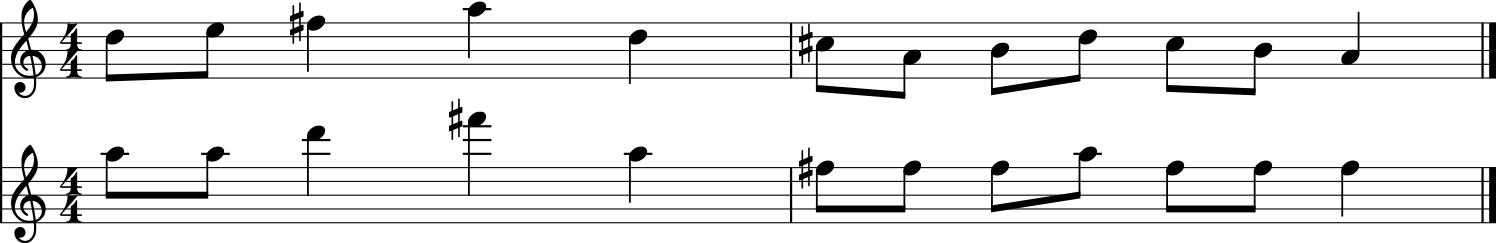

In [23]:
from arvo import tintinnabuli

t_voice = tintinnabuli.create_t_voice(
    m_voice = abb_melody,
    t_chord = ["D", "F#", "A"], # notes in chord I for the key signature
    position = 2,
    direction = tintinnabuli.Direction.UP
)

tin_melody_1 = stream.Score()
tin_melody_1.insert(abb_melody)
tin_melody_1.insert(t_voice)
tin_melody_1.show()
tin_melody_1.show('midi')

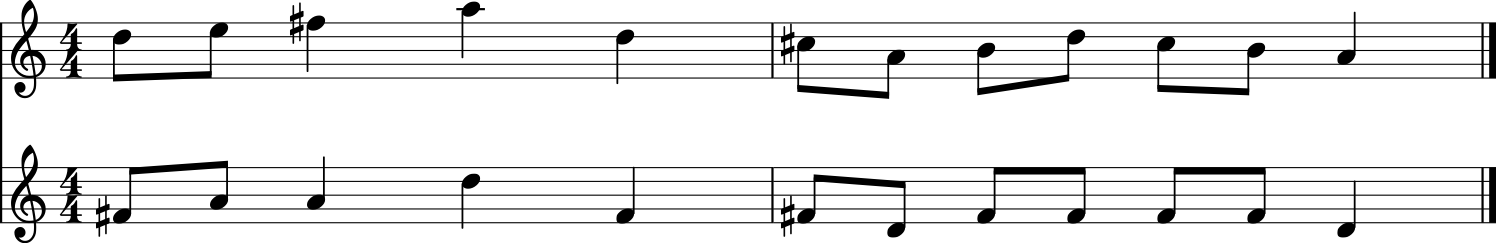

In [24]:
t_voice = tintinnabuli.create_t_voice(
    m_voice = abb_melody,
    t_chord = ["D", "F#", "A"],
    position = 2,
    direction = tintinnabuli.Direction.DOWN
)

tin_melody_2 = stream.Score()
tin_melody_2.insert(abb_melody)
tin_melody_2.insert(t_voice)
tin_melody_2.show()
tin_melody_2.show('midi')

## (4) Additive and subtractive processes

Processes often used in minimalism music (e.g. music by Terry Riley, Steve Reich and Philip Glass) that add in repetition with variation to slowly build up or remove the theme from the melody and transiting to another pattern.

### Additive 
A forward additive process with one repetition will take the first note, then the first and second, then first, second and third and so on as [1, 1, 2, 1, 2, 3, 1, 2, 3, 4]. 

Two repetitions will expand the melody more slowly, as [1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4]. 

* More about additive minimalism: https://musictheory.pugetsound.edu/mt21c/AdditiveMinimalism.html


### Subtractive
Instead of adding the notes gradually, a subtractive process removes them. A forward subtractive process with one repetition will go as [1, 2, 3, 4, 2, 3, 4, 3, 4, 4].

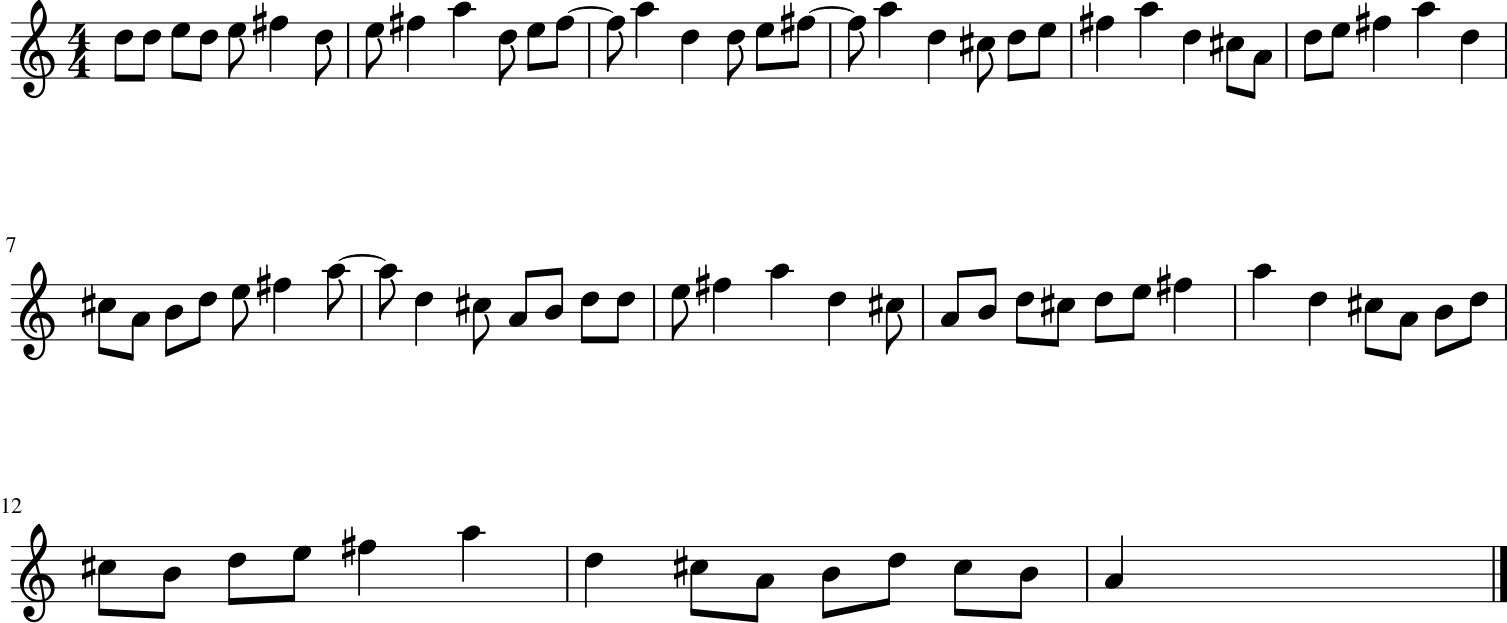

In [25]:
from arvo import minimalism

addt_melody = minimalism.additive_process(
    abb_melody,
    repetitions = [1],
    direction = minimalism.Direction.FORWARD,
)

addt_melody.show()
addt_melody.show('midi')

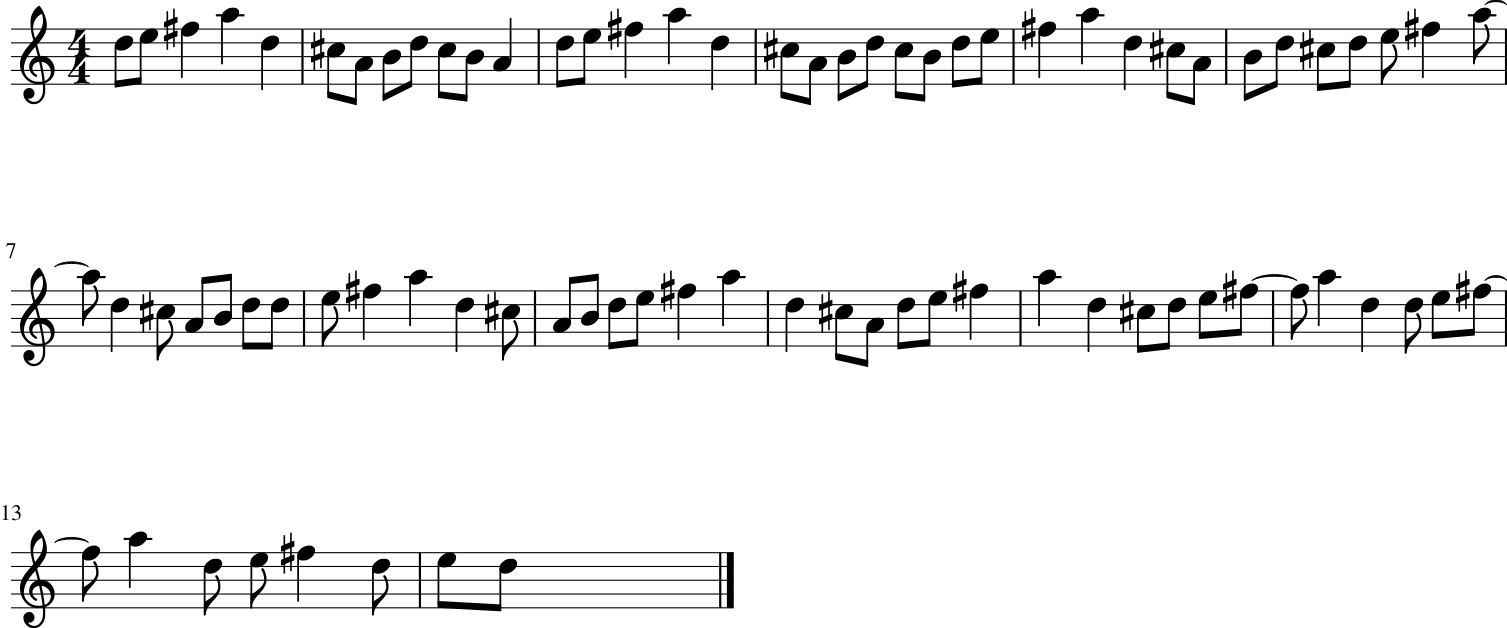

In [26]:
subt_melody = minimalism.subtractive_process(
    abb_melody,
    repetitions = [1],
    direction = minimalism.Direction.BACKWARD,
)

subt_melody.show()
subt_melody.show('midi')